# Linear Regression Intuition:

## Sample Data

Consider the following data with heights and corresponding weights of samples of a particular species of a plant.

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"height(cm)": [10, 24, 43, 35, 52],
                   "weight(kg)": [1.2, 3.1, 3.8, 2.7, 5.8]})
df

,height(cm),weight(kg)
0,10,1.2
1,24,3.1
2,43,3.8
3,35,2.7
4,52,5.8


## Visualizing Data

Here is how the scatter plot of the data looks like.

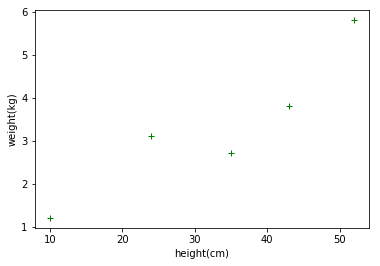

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(df["height(cm)"], df["weight(kg)"], "g+")
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')
plt.show()

## Fitting a rough linear model

Clearly, height holds positive correlation with weight. More the height, more the weight.

In order to predict the weight of a 29cm tall plant, let's use the line as shown in the graph. The equation of the line is 

>$weight = 0.1 + 0.1* height$

It seems to fit the pattern of the scatter plot.

## Visualization

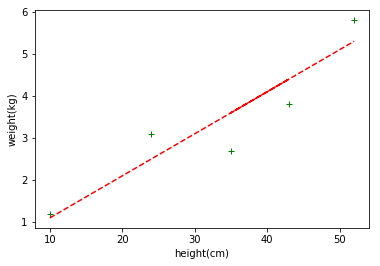

In [3]:
plt.plot(df["height(cm)"], df["weight(kg)"], "g+")
plt.plot(df["height(cm)"], 0.1 + 0.1*df["height(cm)"], "r--")
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')
plt.show()

# Cost Function:

## Intuition

In addition to the previous line, consider two more lines,

>$weight = 0.3 + 0.09* height$, and

>$weight = 0.1 + 0.12* height$

* Now, instead of the red line, if we used green line or blue line, we would get weight 2.9 kg and 3.6 kg respectively.

* More formally, given a training set, how do we pick, or learn, the parameters θ? 

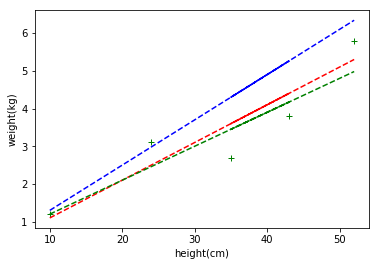

In [4]:
plt.plot(df["height(cm)"], df["weight(kg)"], "g+")
plt.plot(df["height(cm)"], 0.1 + 0.1*df["height(cm)"], "r--")
plt.plot(df["height(cm)"], 0.3 + 0.09*df["height(cm)"], "g--")
plt.plot(df["height(cm)"], 0.1 + 0.12*df["height(cm)"], "b--")
plt.xlabel('height(cm)')
plt.ylabel('weight(kg)')
plt.show()

## Cost Function Definition

## Calculating Cost Function

In [5]:
df["red_line_cost"] = (0.1 + 0.1*df["height(cm)"] - df["weight(kg)"])**2
df["green_line_cost"] = (0.3 + 0.09*df["height(cm)"] - df["weight(kg)"])**2
df["blue_line_cost"] = (0.1 + 0.12*df["height(cm)"] - df["weight(kg)"])**2

print("J(red_line):", sum(df["red_line_cost"]))
print("J(green_line):", sum(df["green_line_cost"]))
print("J(blue_line):", sum(df["blue_line_cost"]))

('J(red_line):', 1.7899999999999989)
('J(green_line):', 1.7814000000000001)
('J(blue_line):', 5.0075999999999983)


## Deriving the closed-form solution


Let's see how closed form solution works out for our example.

Let's add another column called thickness to our dataset and make the problem _multivariate_.

## Closed-form in Python

In [6]:
df["thickness(mm)"] = [8, 13, 19, 26, 30]
df

,height(cm),weight(kg),red_line_cost,green_line_cost,blue_line_cost,thickness(mm)
0,10,1.2,0.01,0.0000,0.0100,8
1,24,3.1,0.36,0.4096,0.0144,13
2,43,3.8,0.36,0.1369,2.1316,19
3,35,2.7,0.81,0.5625,2.5600,26
4,52,5.8,0.25,0.6724,0.2916,30


In [7]:
X = np.array(df[["height(cm)", "thickness(mm)"] ])
y = np.array(df["weight(kg)"])
theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

In [8]:
theta

array([ 0.11482838, -0.02587724])

# Linear Regression through sklearn


Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

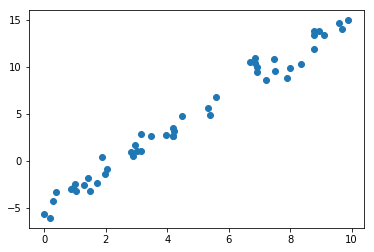

In [10]:
rng = np.random.RandomState(1)
x1 = 10 * rng.rand(50)
y1 = 2 * x1 - 5 + rng.randn(50)
plt.scatter(x1, y1);

model coeff: 2.02720881036
model intercept: -4.99857708555


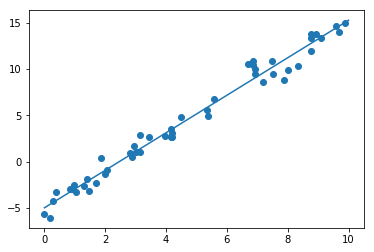

In [11]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression(fit_intercept=True)

model1.fit(x1[:, np.newaxis], y1)

xfit1 = np.linspace(0, 10, 1000)
yfit1 = model1.predict(xfit1[:, np.newaxis])
print "model coeff:", model1.coef_[0]
print "model intercept:", model1.intercept_

plt.scatter(x1, y1)
plt.plot(xfit1, yfit1);

In [12]:
print("Model slope:    ", model1.coef_[0])
print("Model intercept:", model1.intercept_)

('Model slope:    ', 2.0272088103606953)
('Model intercept:', -4.9985770855532037)


We see that the results are very close to the inputs, as we might hope.